# Basic User Statistics

We look at quarterly usage and break down measurements by account and non-account usage.

In [3]:
# install a magic to reload the src directory
%load_ext autoreload
%autoreload 2

In [4]:
from pyspark.sql import SparkSession, functions as F, types as T

spark = SparkSession.builder.getOrCreate()

In [5]:
from src.data.clean_wikipedia import extract, transform

path = "../data/processed/enwiki-20080103/"
df = extract(spark, path)
df.createOrReplaceTempView("enwiki")

In [6]:
%time df.count()

CPU times: user 1.6 ms, sys: 5.24 ms, total: 6.85 ms
Wall time: 21.2 s


116590880

In [7]:
spark.sql("""
SELECT
    year(timestamp),
    count(*)
FROM enwiki
GROUP BY 1
ORDER BY 2 DESC
""").show()

+-----------------------------+--------+
|year(CAST(timestamp AS DATE))|count(1)|
+-----------------------------+--------+
|                         2007|52339093|
|                         2006|41207871|
|                         2005|15383869|
|                         2004| 5251015|
|                         2003| 1240276|
|                         2008|  629009|
|                         2002|  498977|
|                         2001|   40770|
+-----------------------------+--------+



In [8]:
user_stats = spark.sql("""
SELECT 
    year(timestamp) as year,
    quarter(timestamp) as qtr,
    cast(user_id as int) is null as anon,
    sum(word_count) as wc,
    sum(minor) as minor,
    count(distinct user_id) as n_users,
    count(*) as n_edits
FROM enwiki
group by 1, 2, 3
order by 1, 2, 3
""").toPandas()

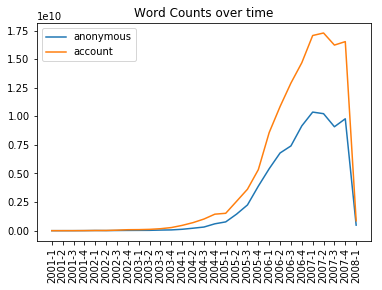

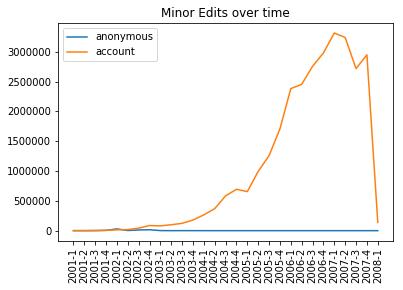

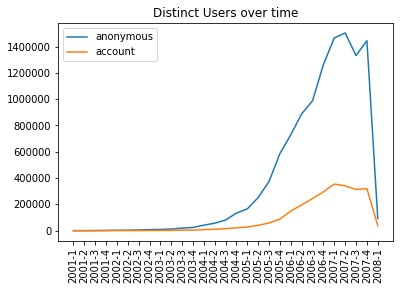

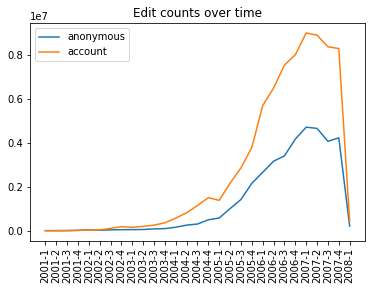

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

user_stats['year_qtr'] = user_stats.year.map(str) + '-' + user_stats.qtr.map(str)
anon = user_stats[user_stats.anon]
acc = user_stats[~user_stats.anon]

def plot(metric, name):
    plt.title("{} over time".format(name))
    plt.plot(anon.year_qtr, anon[metric], label="anonymous")
    plt.plot(acc.year_qtr, acc[metric], label="account")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

plot("wc", "Word Counts")
plot("minor", "Minor Edits")
plot("n_users", "Distinct Users")
plot("n_edits", "Edit counts")

In [11]:
anon

,year,qtr,anon,wc,minor,n_users,n_edits,year_qtr
1,2001,1,True,433383,340,155,1128,2001-1
3,2001,2,True,469155,653,188,1913,2001-2
5,2001,3,True,1047729,1399,836,4057,2001-3
7,2001,4,True,4577718,4591,1717,13061,2001-4
9,2002,1,True,14296762,29756,3211,42962,2002-1
11,2002,2,True,8229815,2991,3296,18620,2002-2
13,2002,3,True,15859244,11715,5461,36430,2002-3
15,2002,4,True,22506509,15524,7910,46207,2002-4
17,2003,1,True,25950774,1176,9361,48337,2003-1
19,2003,2,True,29495215,23,12199,53867,2003-2


In [12]:
acc

,year,qtr,anon,wc,minor,n_users,n_edits,year_qtr
0,2001,1,False,127014,218,21,598,2001-1
2,2001,2,False,172332,282,27,1067,2001-2
4,2001,3,False,885033,1632,99,3438,2001-3
6,2001,4,False,5533599,6534,175,15508,2001-4
8,2002,1,False,13677601,13733,376,30774,2002-1
10,2002,2,False,16864249,17714,385,36241,2002-2
12,2002,3,False,44155067,42471,729,105819,2002-3
14,2002,4,False,82980569,86113,1076,181924,2002-4
16,2003,1,False,90608289,80108,1664,154231,2003-1
18,2003,2,False,114122422,99318,2082,196484,2003-2
